# Importing Libraries

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np

import requests

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from PIL import Image, ImageOps

import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Pre-configured Parameters

In [5]:
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

# Configuring Other Notebook Parameters

In [6]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [7]:
sys.path.append("../")

In [8]:
from Modules import *

In [9]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

# Practicing in Stages

## Testing LeNet

In [10]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_dataset = datasets.CIFAR10(root="../Datasets",
                                    train=True,
                                    download=True,
                                    transform=transform)

validation_dataset = datasets.CIFAR10(root="../Datasets",
                                      train=False,
                                      download=True,
                                      transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=100,
                                              shuffle=True)

validation_loader = torch.utils.data.DataLoader(validation_dataset,
                                                batch_size=100,
                                                shuffle=False)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of the CIFAR-10 training and validation datasets"
)

statements = [
    """
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_dataset = datasets.CIFAR10(root="../Datasets",
                                    train=True,
                                    download=True,
                                    transform=transform)

validation_dataset = datasets.CIFAR10(root="../Datasets",
                                      train=False,
                                      download=True,
                                      transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=100,
                                              shuffle=True)

validation_loader = torch.utils.data.DataLoader(validation_dataset,
                                                batch_size=100,
                                                shuffle=False)
"""
]
tabulation.statement_generator(statements)

variables = [
    "transform",
    "training_dataset",
    "validation_dataset",
]
values = [
    str(transform),
    str(training_dataset),
    str(validation_dataset),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(training_loader)", "len(training_loader.dataset)",
    "list(training_loader)[0][0].shape", "list(training_loader)[0][1].shape",
    "next(iter(training_loader))[0].shape",
    "next(iter(training_loader))[1].shape", "len(validation_loader)",
    "len(validation_loader.dataset)", "list(validation_loader)[0][0].shape",
    "list(validation_loader)[0][1].shape",
    "next(iter(validation_loader))[0].shape",
    "next(iter(validation_loader))[1].shape"
]
results = [
    str(len(training_loader)),
    str(len(training_loader.dataset)),
    str(list(training_loader)[0][0].shape),
    str(list(training_loader)[0][1].shape),
    str(next(iter(training_loader))[0].shape),
    str(next(iter(training_loader))[1].shape),
    str(len(validation_loader)),
    str(len(validation_loader.dataset)),
    str(list(validation_loader)[0][0].shape),
    str(list(validation_loader)[0][1].shape),
    str(next(iter(validation_loader))[0].shape),
    str(next(iter(validation_loader))[1].shape),
]
tabulation.expression_generator(expressions, results, 12)

Files already downloaded and verified
Files already downloaded and verified
Loading and transformation of the CIFAR-10 training and validation datasets

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | transform = transforms.Compose([                            |
    |     transforms.Resize((32, 32)),                            |
    |     transforms.ToTensor(),                                  |
    |     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  |
    | ])                                                          |
    |                                                             |
    | training_dataset = datasets.CIFAR10(root="../Datasets",     |
    |                                     train=True,             |
    |                                     download=True,          |
    |                          

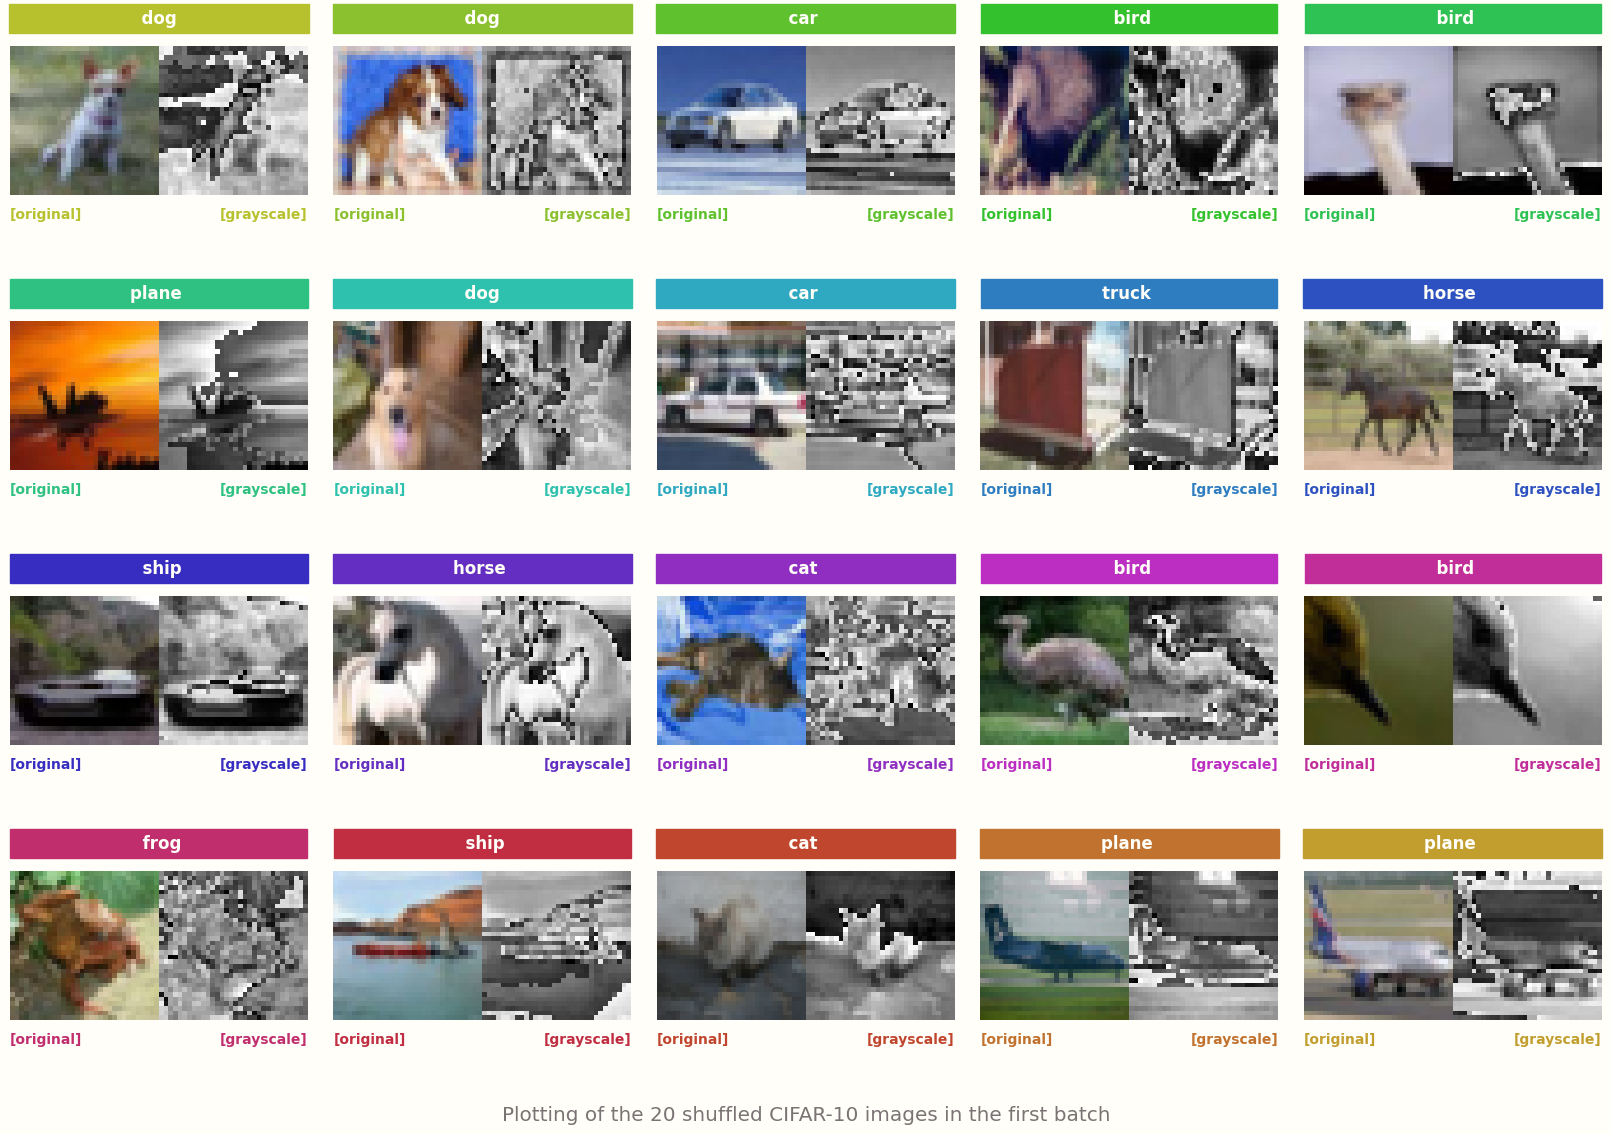

In [11]:
def tensor_to_image(tensor):
    transform = transforms.ToPILImage()
    return transform(tensor)


def grayscale_image(image):
    transform = transforms.Grayscale()
    return transform(image)


def grayscale_image_conversion(image):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, ), (0.5, ))
    ])
    return transform(image)


def grayscale_im_convert(tensor):
    image = tensor_to_image(tensor)
    image = grayscale_image(image)
    tensor = grayscale_image_conversion(image).permute(1, 2, 0)
    array = tensor.clone().detach().numpy()
    array = array.reshape(array.shape[0], -1)
    array = array * 0.5 + 0.5
    array = array.clip(0, 1)
    return array


colors = calm_color_generator(20)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse",
           "ship", "truck")

fig = plt.figure(figsize=(figure_size[0], figure_size[1] / 9 * 11),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=5, figure=fig, wspace=.08, hspace=None)

dataiter = iter(training_loader)
images, labels = next(dataiter)

for idx in np.arange(20):
    bgcolor = colors.pop(0)
    ax = fig.add_subplot(gs[idx // 5, idx % 5],
                         xticks=[],
                         yticks=[],
                         frameon=False)
    spaces = " " * 23
    title = classes[labels[idx].item()]
    if title in ["dog", "deer"]:
        title = title.center(50 - len(title))
    else:
        title = title.center(51 - len(title))
    ax.set_title(title,
                 loc="center",
                 pad=0,
                 backgroundcolor=bgcolor,
                 color=plt.rcParams["axes.facecolor"],
                 fontweight="heavy")

    axins1 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper left",
                        borderpad=0)
    axins1.set(xticks=[], yticks=[], frame_on=False)
    axins1.imshow(im_convert(images[idx]))
    axins1.set_xlabel("[original]",
                      loc="left",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

    axins2 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper right",
                        borderpad=0)
    axins2.set(xticks=[], yticks=[], frame_on=False)
    axins2.imshow(grayscale_im_convert(images[idx]), cmap="binary_r")
    axins2.set_xlabel("[grayscale]",
                      loc="right",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

fig.suptitle("Plotting of the 20 shuffled CIFAR-10 images in the first batch",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.show()

In [12]:
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(5 * 5 * 50, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 5 * 5 * 50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x


tabulation = Form_Generator()
tabulation.heading_printer(
    "Definition of custom convolutional neural module class of LeNet structure"
)

definitions = [
    """
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(5 * 5 * 50, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 5 * 5 * 50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x
"""
]
tabulation.definition_generator(definitions)

Definition of custom convolutional neural module class of LeNet structure

    +-----------------------------------------------+
    | Definition                                    |
    +-----------------------------------------------+
    | class LeNet(nn.Module):                       |
    |                                               |
    |     def __init__(self):                       |
    |         super().__init__()                    |
    |         self.conv1 = nn.Conv2d(3, 20, 5, 1)   |
    |         self.conv2 = nn.Conv2d(20, 50, 5, 1)  |
    |         self.fc1 = nn.Linear(5 * 5 * 50, 500) |
    |         self.dropout1 = nn.Dropout(0.5)       |
    |         self.fc2 = nn.Linear(500, 10)         |
    |                                               |
    |     def forward(self, x):                     |
    |         x = F.relu(self.conv1(x))             |
    |         x = F.max_pool2d(x, 2, 2)             |
    |         x = F.relu(self.conv2(x))             |
    |  

In [13]:
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Initialization of neural module, criterion and optimizer")

statements = [
    """
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
"""
]
tabulation.statement_generator(statements)

variables = ["model", "criterion", "optimizer"]
values = [str(model), str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Initialization of neural module, criterion and optimizer

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | model = LeNet().to(device)                                  |
    |                                                             |
    | criterion = nn.CrossEntropyLoss()                           |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) |
    +-------------------------------------------------------------+
    +-----------+-----------------------------------------------+
    | Variable  | Value                                         |
    +-----------+-----------------------------------------------+
    | model     | LeNet(                                        |
    |           |   (conv1): Conv2d(3, 20, kernel_size=(5, 5),  |
    |           |         stride=(1, 1))                        |
  

In [14]:
epochs = 15
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy", "validation loss",
                                "validation accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer(
    "Training and testing of custom convolutional neural module class of "
    "LeNet structure")

statements = [
    """
epochs = 15
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "running_loss_history", "running_accu_history",
    "val_running_loss_history", "val_running_accu_history"
]
values = [
    str(epochs),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in running_accu_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in val_running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in val_running_accu_history]))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Training and testing of custom convolutional neural module class of LeNet structure

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | epochs = 15                                                |
    | running_loss_history = []                                  |
    | running_accu_history = []                                  |
    | val_running_loss_history = []                              |
    | val_running_accu_history = []                              |
    |                                                            |
    | for e in range(epochs):                                    |
    |     running_loss = 0.0                                     |
    |     running_accu = 0                                       |
    |     val_running_loss = 0.0                                 |
    |     val_running_accu = 0              

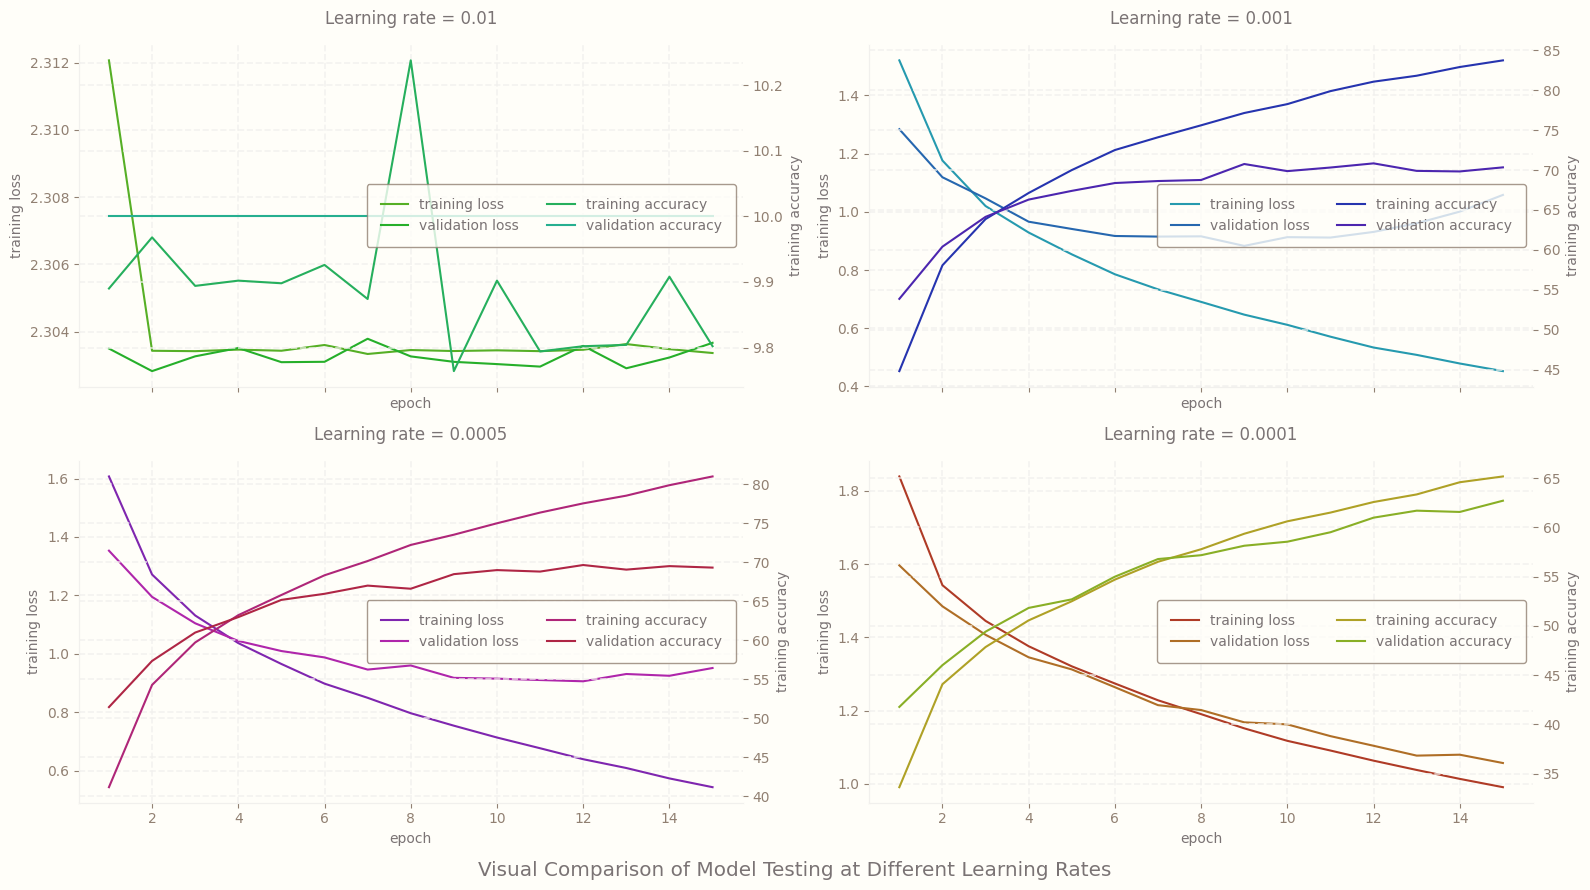

In [15]:
def loader_training_iterations_LeNet(lr, criterion, optimizer_type, **kwargs):
    criterion = criterion
    optimizer = optimizer_type(model.parameters(), lr, **kwargs)
    running_loss = 0.0
    running_accu = 0
    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)
    else:
        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
    return epoch_loss, epoch_accu


def loader_validation_iterations_LeNet(lr, criterion):
    criterion = criterion
    val_running_loss = 0.0
    val_running_accu = 0
    with torch.no_grad():
        for val_inputs, val_labels in validation_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            _, val_preds = torch.max(val_outputs, 1)
            val_running_loss += val_loss.item()
            val_running_accu += torch.sum(val_preds == val_labels.data)
        else:
            val_epoch_loss = val_running_loss / len(validation_loader)
            val_epoch_accu = val_running_accu.float() / len(validation_loader)
    return val_epoch_loss, val_epoch_accu


def validation_iterations_LeNet(epochs,
                                lr,
                                criterion=nn.CrossEntropyLoss(),
                                optimizer_type=torch.optim.Adam,
                                **kwargs):
    epochs = epochs
    loss = []
    accu = []
    val_loss = []
    val_accu = []
    for e in range(epochs):
        epoch_loss, epoch_accu = loader_training_iterations_LeNet(
            lr, criterion, optimizer_type, **kwargs)
        val_epoch_loss, val_epoch_accu = loader_validation_iterations_LeNet(
            lr, criterion)
        loss.append(epoch_loss)
        accu.append(epoch_accu.item())
        val_loss.append(val_epoch_loss)
        val_accu.append(val_epoch_accu.item())
    return loss, accu, val_loss, val_accu


colors = calm_color_generator(16)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

lr_list = [0.01, 0.001, 0.0005, 0.0001]

for i in range(2):
    for j in range(2):
        model = LeNet().to(device)
        loss, accu, val_loss, val_accu = validation_iterations_LeNet(
            epochs=epochs, lr=lr_list[i * 2 + j])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               c=colors.pop(0))
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               val_loss,
                               label="validation loss",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="training loss")
        axs[i, j] = axs[i, j].twinx()
        line3 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               c=colors.pop(0))
        line4 = axs[i, j].plot(range(1, epochs + 1),
                               val_accu,
                               label="validation accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="training accuracy")
        lines = line1 + line2 + line3 + line4
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines,
                         labels,
                         loc="center right",
                         borderpad=1,
                         ncol=2)

for ax, lr in zip(axs.flat, lr_list):
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle("Visual Comparison of Model Testing at Different Learning Rates",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [16]:
url = ("https://c8.alamy.com/comp/DYC06A/"
       "hornless-reindeer-at-zoo-DYC06A.jpg")

response = requests.get(url, stream=True)
img = Image.open(response.raw)

tabulation = Form_Generator()
tabulation.heading_printer("Web image grabbing")

statements = [
    """
url = ("https://c8.alamy.com/comp/DYC06A/"
       "hornless-reindeer-at-zoo-DYC06A.jpg")

response = requests.get(url, stream=True)
img = Image.open(response.raw)
"""
]
tabulation.statement_generator(statements)

variables = ["response"]
values = [str(response)]
tabulation.variable_generator(variables, values)

expressions = ["np.array(img)", "np.array(img).shape"]
results = [str(reprlib_rules.repr(np.array(img))), str(np.array(img).shape)]
tabulation.expression_generator(expressions, results)

Web image grabbing

    +-----------------------------------------------+
    | Statement                                     |
    +-----------------------------------------------+
    | url = ("https://c8.alamy.com/comp/DYC06A/"    |
    |        "hornless-reindeer-at-zoo-DYC06A.jpg") |
    |                                               |
    | response = requests.get(url, stream=True)     |
    | img = Image.open(response.raw)                |
    +-----------------------------------------------+
    +----------+------------------+
    | Variable | Value            |
    +----------+------------------+
    | response | ⟨Response [200]⟩ |
    +----------+------------------+
    +---------------------+--------------------------------------+
    | Expression          | Result                               |
    +---------------------+--------------------------------------+
    | np.array(img)       | array([[[96, 71, 51],                |
    |                     |         [96, 71, 5

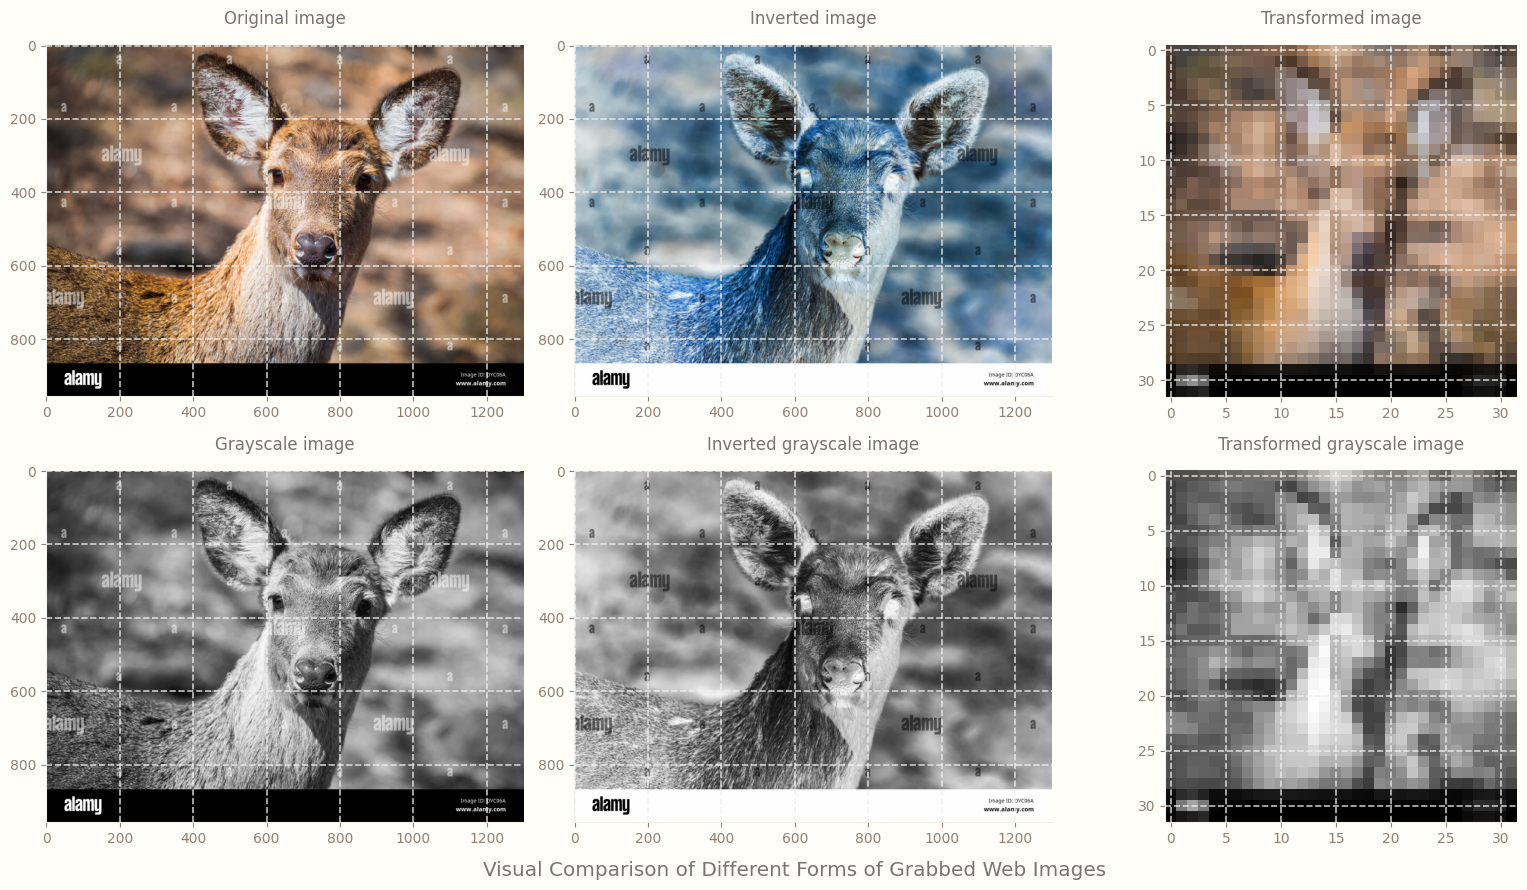

In [17]:
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 3)

axs[0, 0].imshow(img)
axs[0, 0].set_title("Original image", loc="center", pad=15)

inverted_img = ImageOps.invert(img)
axs[0, 1].imshow(inverted_img)
axs[0, 1].set_title("Inverted image", loc="center", pad=15)

transformed_img = transform(img)
axs[0, 2].imshow(im_convert(transformed_img))
axs[0, 2].set_title("Transformed image", loc="center", pad=15)

grayscale_img = grayscale_image(img)
axs[1, 0].imshow(grayscale_img, cmap="binary_r")
axs[1, 0].set_title("Grayscale image", loc="center", pad=15)

axs[1, 1].imshow(grayscale_img, cmap="binary")
axs[1, 1].set_title("Inverted grayscale image", loc="center", pad=15)

transformed_grayscale_img = grayscale_image_conversion(grayscale_img).permute(
    1, 2, 0)
axs[1, 2].imshow(transformed_grayscale_img, cmap="binary_r")
axs[1, 2].set_title("Transformed grayscale image", loc="center", pad=15)

fig.suptitle("Visual Comparison of Different Forms of Grabbed Web Images",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [18]:
img = transform(img)

img = img.to(device).unsqueeze(0)
output = model(img)
_, pred = torch.max(output, 1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Test of the classification model with web-scraped image")

statements = [
    """
img = transform(img)

img = img.to(device).unsqueeze(0)
output = model(img)
_, pred = torch.max(output, 1)
"""
]
tabulation.statement_generator(statements)

variables = ["img", "output", "_", "pred"]
values = [
    str(reprlib_rules.repr(img.cpu())),
    str(output.cpu()),
    str(_.cpu()),
    str(pred.cpu())
]
tabulation.variable_generator(variables, values)

expressions = [
    "img.shape", "torch.max(output, 0)", "torch.max(output, 1)", "pred.item()",
    "classes[pred.item()]"
]
results = [
    str(img.shape),
    str(torch.max(output.cpu(), 0)),
    str(torch.max(output.cpu(), 1)),
    str(pred.item()), classes[pred.item()]
]
tabulation.expression_generator(expressions, results)

Test of the classification model with web-scraped image

    +-----------------------------------+
    | Statement                         |
    +-----------------------------------+
    | img = transform(img)              |
    |                                   |
    | img = img.to(device).unsqueeze(0) |
    | output = model(img)               |
    | _, pred = torch.max(output, 1)    |
    +-----------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | img      | tensor([[[[-0.3647, -0.4353, -0.4431,  ...,      |
    |          |         -0.2627, -0.4431, -0.3490],              |
    |          |           [-0.4745, -0.4353, -0.3333,  ...,      |
    |          |         -0.2235....1608,  0.1216,  ..., -0.7020, |
    |          |         -0.7647, -0.9765],                       |
    |          |     

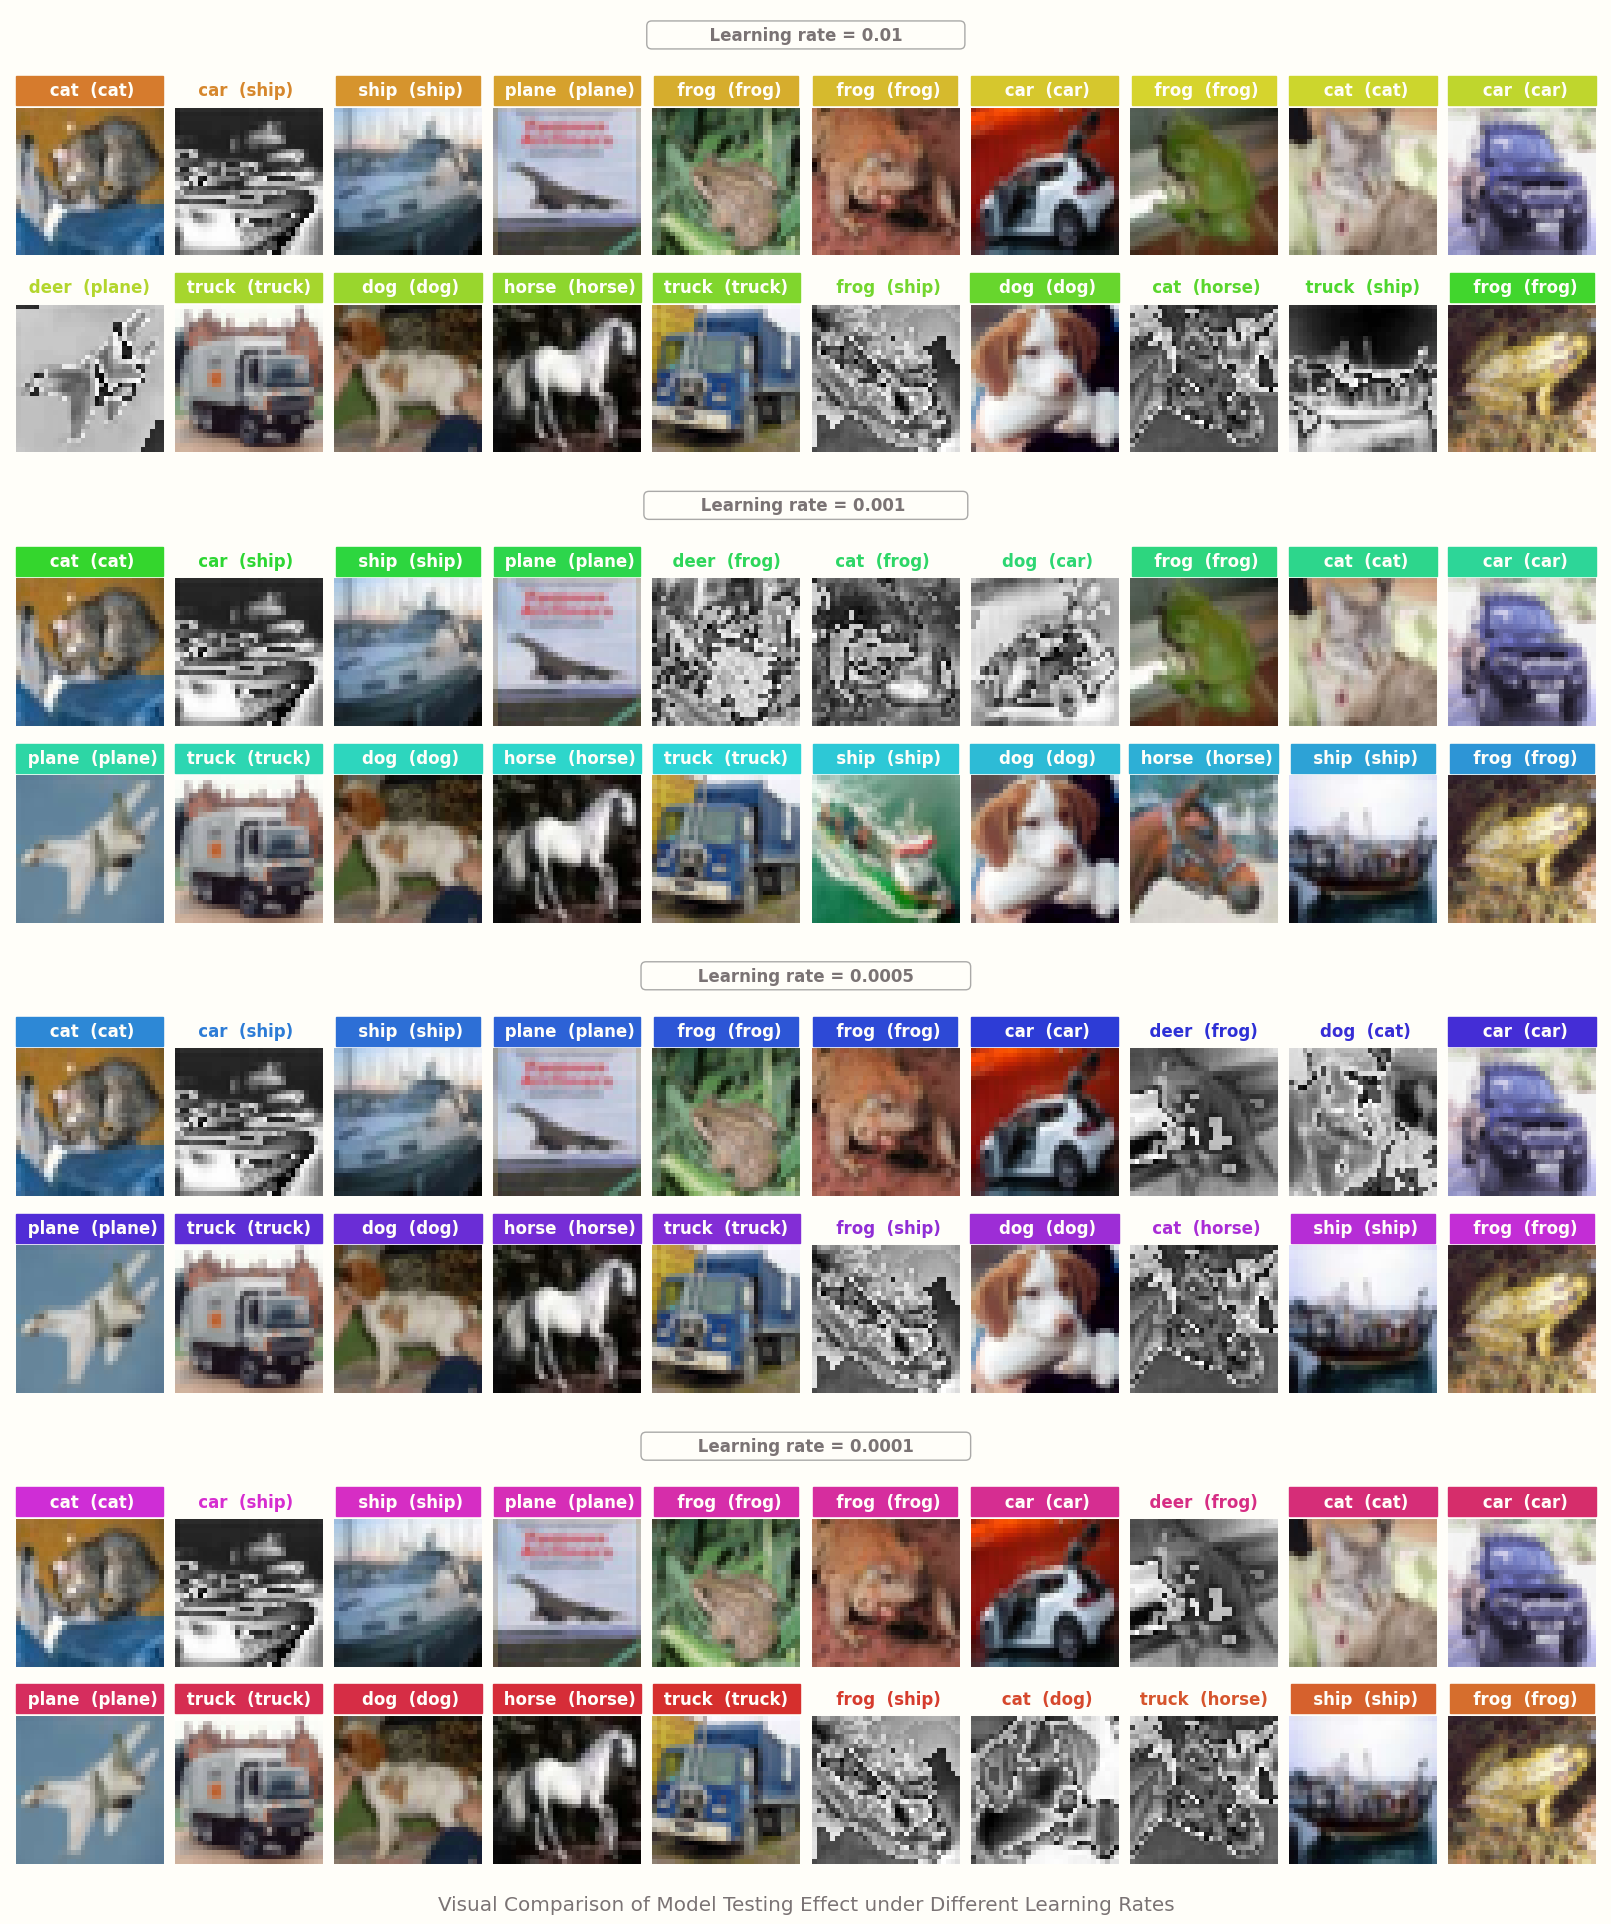

In [19]:
colors = calm_color_generator(80)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 2),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=1, figure=fig, wspace=None, hspace=.2)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

dataiter = iter(validation_loader)
images, labels = next(dataiter)
images_ = images.to(device)
labels = labels.to(device)

for idx, lr in zip(np.arange(4), lr_list):
    model = LeNet().to(device)
    validation_iterations_LeNet(epochs=epochs, lr=lr_list[i * 2 + j])
    outputs = model(images_)
    _, preds = torch.max(outputs, 1)
    title = "Learning rate = {}".format(lr).center(40, " ")
    ax = fig.add_subplot(gs[idx], xticks=[], yticks=[], frameon=False)
    ax.set_title(title,
                 y=.875,
                 loc="center",
                 pad=0,
                 fontweight="heavy",
                 bbox=bbox_props)

    for k in range(20):
        bgcolor = colors.pop(0)
        spaces = " " * 6
        exec(f"axins{k} = ax.inset_axes([0.1 * (k % 10), -0.8 * (k // 10), \
        0.1, 0.6])")
        exec(f"axins{k}.set(xticks=[], yticks=[], frame_on=False)")
        exec(f"axins{k}.imshow(im_convert(images[k])) if preds[k] == \
        labels[k] else axins{k}.imshow(grayscale_im_convert(images[k]), \
        cmap=\"binary\")")

        sub_title_1 = f"{classes[preds[k].item()]}"
        sub_title_2 = f"({classes[labels[k].item()]})"
        sub_title = sub_title_1 + "  " + sub_title_2
        if sub_title_1 in ["dog"]:
            sub_title = sub_title.center(27 - len(sub_title))
        elif sub_title_1 in ["deer"]:
            sub_title = sub_title.center(28 - len(sub_title))
        elif sub_title_1 in ["bird", "truck"]:
            sub_title = sub_title.center(30 - len(sub_title))
        else:
            sub_title = sub_title.center(29 - len(sub_title))

        exec(f"axins{k}.set_title(sub_title, y=1.025, loc=\"center\", \
        color=(plt.rcParams[\"axes.facecolor\"] if preds[k] == labels[k] \
        else bgcolor), backgroundcolor=(bgcolor if preds[k] == labels[k] \
        else plt.rcParams[\"axes.facecolor\"]), fontweight=\"bold\")")

fig.suptitle(
    "Visual Comparison of Model Testing Effect under Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=-0.05)

plt.show()

## Hyperparameter Tuning

In [20]:
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Hyperparameter tuning method 1: \n"
    "1. increasing the learning rate to accelerate training performance")

statements = [
    """
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
"""
]
tabulation.statement_generator(statements)

variables = ["model", "criterion", "optimizer"]
values = [str(model), str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Hyperparameter tuning method 1: 
1. increasing the learning rate to accelerate training performance

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | model = LeNet().to(device)                                 |
    |                                                            |
    | criterion = nn.CrossEntropyLoss()                          |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.001) |
    +------------------------------------------------------------+
    +-----------+-----------------------------------------------+
    | Variable  | Value                                         |
    +-----------+-----------------------------------------------+
    | model     | LeNet(                                        |
    |           |   (conv1): Conv2d(3, 20, kernel_size=(5, 5),  |
    |           |         stride=

In [21]:
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy", "validation loss",
                                "validation accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer(
    "Training and testing of custom convolutional neural module class of "
    "LeNet structure")

statements = [
    """
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "running_loss_history", "running_accu_history",
    "val_running_loss_history", "val_running_accu_history"
]
values = [
    str(epochs),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in running_accu_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in val_running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in val_running_accu_history]))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Training and testing of custom convolutional neural module class of LeNet structure

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | running_loss_history = []                                  |
    | running_accu_history = []                                  |
    | val_running_loss_history = []                              |
    | val_running_accu_history = []                              |
    |                                                            |
    | for e in range(epochs):                                    |
    |     running_loss = 0.0                                     |
    |     running_accu = 0                                       |
    |     val_running_loss = 0.0                                 |
    |     val_running_accu = 0                                   |
    |                                       

In [22]:
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.fc1 = nn.Linear(4 * 4 * 64, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x


tabulation = Form_Generator()
tabulation.heading_printer(
    "Hyperparameter tuning method 2, 3 & 4: \n"
    "2. adding more convolutional layers to extract more complex features\n"
    "3. using smaller kernel sizes to reduce overfitting\n"
    "4. including padding to ensure maximum feature extraction")

definitions = [
    """
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.fc1 = nn.Linear(4 * 4 * 64, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x
"""
]
tabulation.definition_generator(definitions)

Hyperparameter tuning method 2, 3 & 4: 
2. adding more convolutional layers to extract more complex features
3. using smaller kernel sizes to reduce overfitting
4. including padding to ensure maximum feature extraction

    +---------------------------------------------------------+
    | Definition                                              |
    +---------------------------------------------------------+
    | class LeNet(nn.Module):                                 |
    |                                                         |
    |     def __init__(self):                                 |
    |         super().__init__()                              |
    |         self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)  |
    |         self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1) |
    |         self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1) |
    |         self.fc1 = nn.Linear(4 * 4 * 64, 500)           |
    |         self.dropout1 = nn.Dropout(0.5)                 |
    |       

In [23]:
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Reinitialization of neural module, criterion and optimizer")

statements = [
    """
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
"""
]
tabulation.statement_generator(statements)

variables = ["model", "criterion", "optimizer"]
values = [str(model), str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Reinitialization of neural module, criterion and optimizer

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | model = LeNet().to(device)                                 |
    |                                                            |
    | criterion = nn.CrossEntropyLoss()                          |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.001) |
    +------------------------------------------------------------+
    +-----------+-----------------------------------------------+
    | Variable  | Value                                         |
    +-----------+-----------------------------------------------+
    | model     | LeNet(                                        |
    |           |   (conv1): Conv2d(3, 16, kernel_size=(3, 3),  |
    |           |         stride=(1, 1), padding=(1, 1))        |
    |   

In [24]:
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy", "validation loss",
                                "validation accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer(
    "Training and testing of custom convolutional neural module class of "
    "LeNet structure")

statements = [
    """
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "running_loss_history", "running_accu_history",
    "val_running_loss_history", "val_running_accu_history"
]
values = [
    str(epochs),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in running_accu_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in val_running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in val_running_accu_history]))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Training and testing of custom convolutional neural module class of LeNet structure

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | running_loss_history = []                                  |
    | running_accu_history = []                                  |
    | val_running_loss_history = []                              |
    | val_running_accu_history = []                              |
    |                                                            |
    | for e in range(epochs):                                    |
    |     running_loss = 0.0                                     |
    |     running_accu = 0                                       |
    |     val_running_loss = 0.0                                 |
    |     val_running_accu = 0                                   |
    |                                       

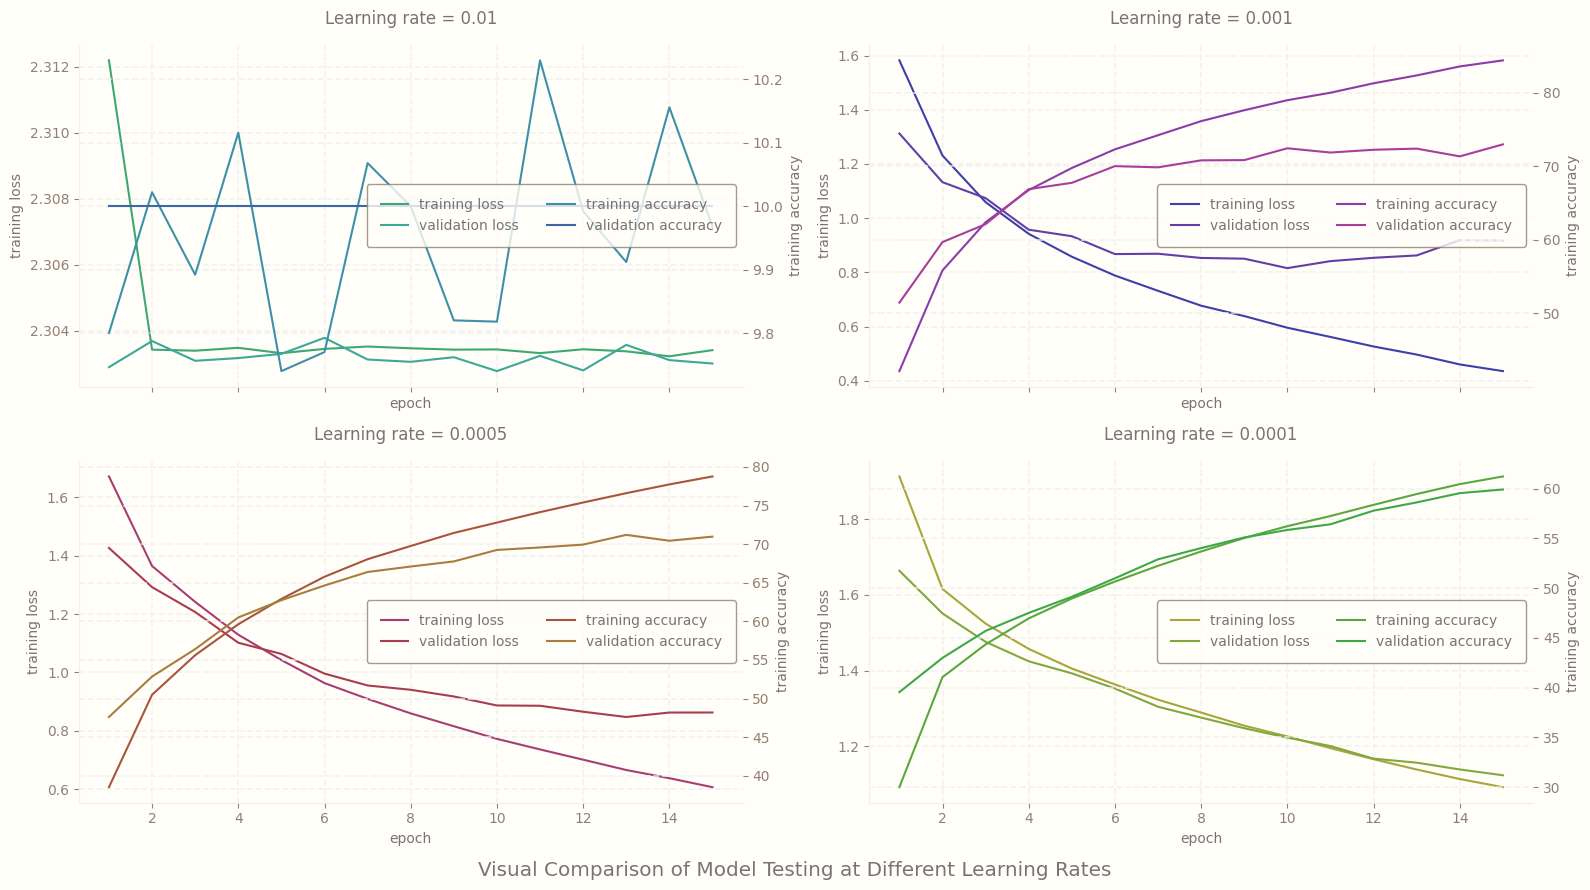

In [25]:
colors = calm_color_generator(16)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

for i in range(2):
    for j in range(2):
        model = LeNet().to(device)
        loss, accu, val_loss, val_accu = validation_iterations_LeNet(
            epochs=epochs, lr=lr_list[i * 2 + j])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               c=colors.pop(0))
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               val_loss,
                               label="validation loss",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="training loss")
        axs[i, j] = axs[i, j].twinx()
        line3 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               c=colors.pop(0))
        line4 = axs[i, j].plot(range(1, epochs + 1),
                               val_accu,
                               label="validation accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="training accuracy")
        lines = line1 + line2 + line3 + line4
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines,
                         labels,
                         loc="center right",
                         borderpad=1,
                         ncol=2)

for ax, lr in zip(axs.flat, lr_list):
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle("Visual Comparison of Model Testing at Different Learning Rates",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

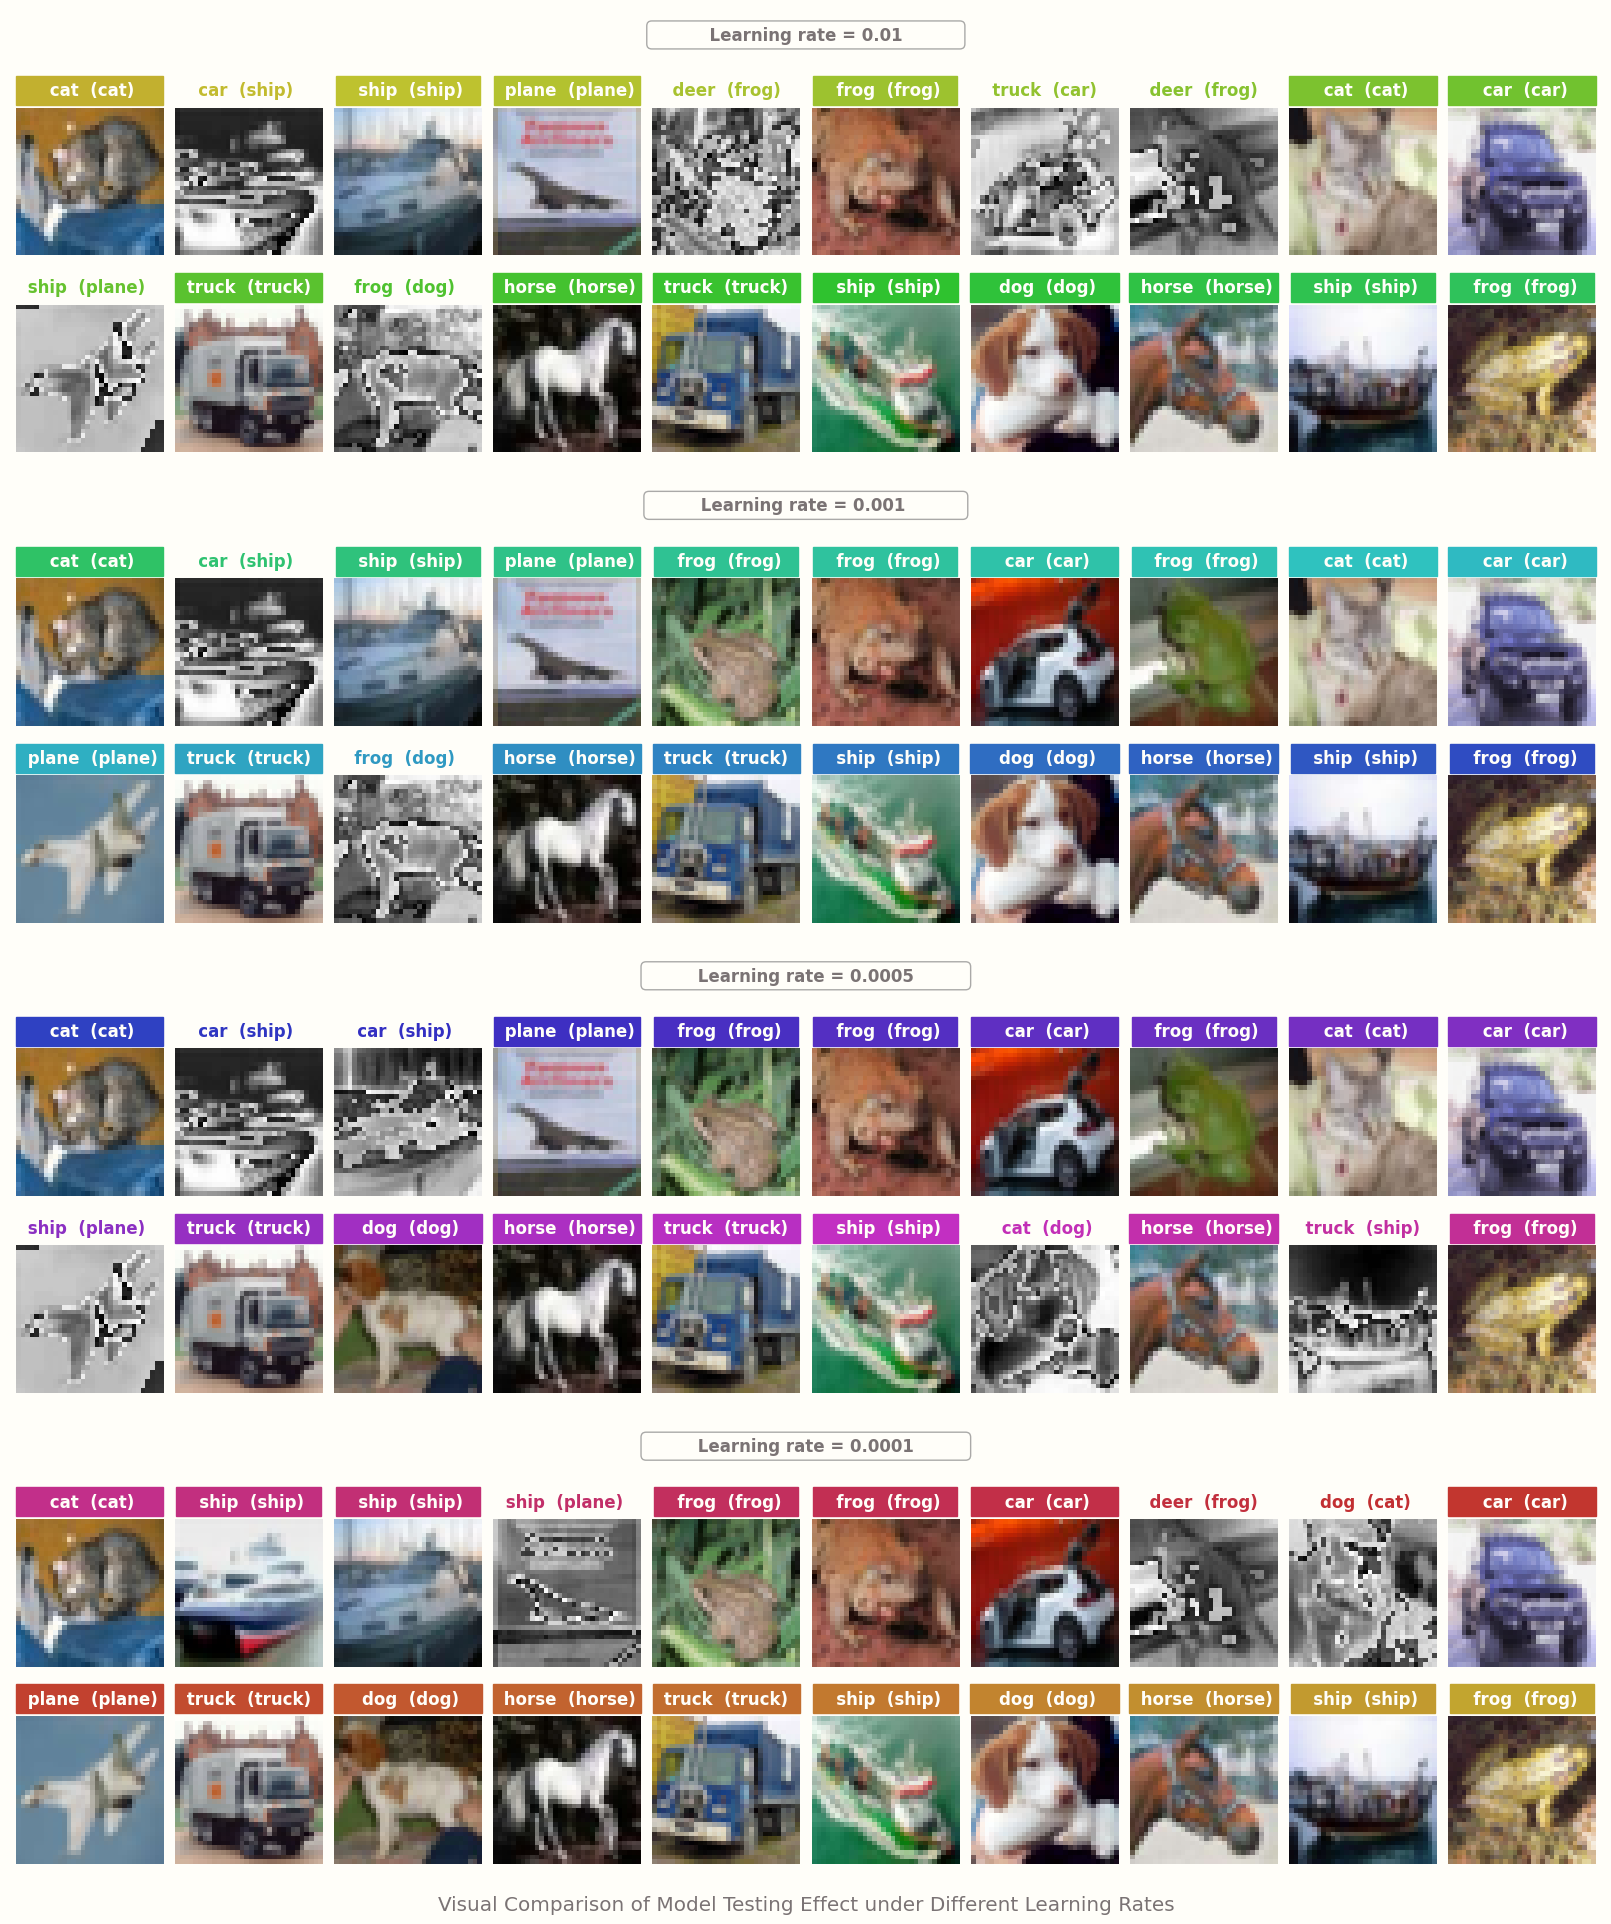

In [26]:
colors = calm_color_generator(80)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 2),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=1, figure=fig, wspace=None, hspace=.2)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

dataiter = iter(validation_loader)
images, labels = next(dataiter)
images_ = images.to(device)
labels = labels.to(device)

for idx, lr in zip(np.arange(4), lr_list):
    model = LeNet().to(device)
    validation_iterations_LeNet(epochs=epochs, lr=lr_list[i * 2 + j])
    outputs = model(images_)
    _, preds = torch.max(outputs, 1)
    title = "Learning rate = {}".format(lr).center(40, " ")
    ax = fig.add_subplot(gs[idx], xticks=[], yticks=[], frameon=False)
    ax.set_title(title,
                 y=.875,
                 loc="center",
                 pad=0,
                 fontweight="heavy",
                 bbox=bbox_props)

    for k in range(20):
        bgcolor = colors.pop(0)
        spaces = " " * 6
        exec(f"axins{k} = ax.inset_axes([0.1 * (k % 10), -0.8 * (k // 10), \
        0.1, 0.6])")
        exec(f"axins{k}.set(xticks=[], yticks=[], frame_on=False)")
        exec(f"axins{k}.imshow(im_convert(images[k])) if preds[k] == \
        labels[k] else axins{k}.imshow(grayscale_im_convert(images[k]), \
        cmap=\"binary\")")

        sub_title_1 = f"{classes[preds[k].item()]}"
        sub_title_2 = f"({classes[labels[k].item()]})"
        sub_title = sub_title_1 + "  " + sub_title_2
        if sub_title_1 in ["dog"]:
            sub_title = sub_title.center(27 - len(sub_title))
        elif sub_title_1 in ["deer"]:
            sub_title = sub_title.center(28 - len(sub_title))
        elif sub_title_1 in ["bird", "truck"]:
            sub_title = sub_title.center(30 - len(sub_title))
        else:
            sub_title = sub_title.center(29 - len(sub_title))

        exec(f"axins{k}.set_title(sub_title, y=1.025, loc=\"center\", \
        color=(plt.rcParams[\"axes.facecolor\"] if preds[k] == labels[k] \
        else bgcolor), backgroundcolor=(bgcolor if preds[k] == labels[k] \
        else plt.rcParams[\"axes.facecolor\"]), fontweight=\"bold\")")

fig.suptitle(
    "Visual Comparison of Model Testing Effect under Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=-0.05)

plt.show()

## Data Augmentation

In [27]:
transform_train = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_dataset = datasets.CIFAR10(root="../Datasets",
                                    train=True,
                                    download=True,
                                    transform=transform_train)

training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=100,
                                              shuffle=True)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Augmenting the training dataset by transforming the existing dataset")

statements = [
    """
transform_train = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_dataset = datasets.CIFAR10(root="../Datasets",
                                    train=True,
                                    download=True,
                                    transform=transform_train)

training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=100,
                                              shuffle=True)
"""
]
tabulation.statement_generator(statements)

variables = [
    "transform",
    "training_dataset",
]
values = [
    str(transform),
    str(training_dataset),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(training_loader)", "len(training_loader.dataset)",
    "list(training_loader)[0][0].shape", "list(training_loader)[0][1].shape",
    "next(iter(training_loader))[0].shape",
    "next(iter(training_loader))[1].shape"
]
results = [
    str(len(training_loader)),
    str(len(training_loader.dataset)),
    str(list(training_loader)[0][0].shape),
    str(list(training_loader)[0][1].shape),
    str(next(iter(training_loader))[0].shape),
    str(next(iter(training_loader))[1].shape)
]
tabulation.expression_generator(expressions, results, 12)

Files already downloaded and verified
Augmenting the training dataset by transforming the existing dataset

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | transform_train = transforms.Compose([                      |
    |     transforms.Resize((32, 32)),                            |
    |     transforms.RandomHorizontalFlip(),                      |
    |     transforms.RandomRotation(10),                          |
    |     transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)), |
    |     transforms.ColorJitter(brightness=0.2, contrast=0.2,    |
    |     saturation=0.2),                                        |
    |     transforms.ToTensor(),                                  |
    |     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  |
    | ])                                                          |
    |   

In [28]:
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Reinitialization of neural module, criterion and optimizer")

statements = [
    """
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
"""
]
tabulation.statement_generator(statements)

variables = ["model", "criterion", "optimizer"]
values = [str(model), str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Reinitialization of neural module, criterion and optimizer

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | model = LeNet().to(device)                                 |
    |                                                            |
    | criterion = nn.CrossEntropyLoss()                          |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.001) |
    +------------------------------------------------------------+
    +-----------+-----------------------------------------------+
    | Variable  | Value                                         |
    +-----------+-----------------------------------------------+
    | model     | LeNet(                                        |
    |           |   (conv1): Conv2d(3, 16, kernel_size=(3, 3),  |
    |           |         stride=(1, 1), padding=(1, 1))        |
    |   

In [ ]:
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy", "validation loss",
                                "validation accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer(
    "Training and testing of custom convolutional neural module class of "
    "LeNet structure")

statements = [
    """
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "running_loss_history", "running_accu_history",
    "val_running_loss_history", "val_running_accu_history"
]
values = [
    str(epochs),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in running_accu_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in val_running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in val_running_accu_history]))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

In [ ]:
colors = calm_color_generator(16)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

for i in range(2):
    for j in range(2):
        model = LeNet().to(device)
        loss, accu, val_loss, val_accu = validation_iterations_LeNet(
            epochs=epochs, lr=lr_list[i * 2 + j])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               c=colors.pop(0))
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               val_loss,
                               label="validation loss",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="training loss")
        axs[i, j] = axs[i, j].twinx()
        line3 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               c=colors.pop(0))
        line4 = axs[i, j].plot(range(1, epochs + 1),
                               val_accu,
                               label="validation accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="training accuracy")
        lines = line1 + line2 + line3 + line4
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines,
                         labels,
                         loc="center right",
                         borderpad=1,
                         ncol=2)

for ax, lr in zip(axs.flat, lr_list):
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle("Visual Comparison of Model Testing at Different Learning Rates",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [ ]:
colors = calm_color_generator(80)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 2),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=1, figure=fig, wspace=None, hspace=.2)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

dataiter = iter(validation_loader)
images, labels = next(dataiter)
images_ = images.to(device)
labels = labels.to(device)

for idx, lr in zip(np.arange(4), lr_list):
    model = LeNet().to(device)
    validation_iterations_LeNet(epochs=epochs, lr=lr_list[i * 2 + j])
    outputs = model(images_)
    _, preds = torch.max(outputs, 1)
    title = "Learning rate = {}".format(lr).center(40, " ")
    ax = fig.add_subplot(gs[idx], xticks=[], yticks=[], frameon=False)
    ax.set_title(title,
                 y=.875,
                 loc="center",
                 pad=0,
                 fontweight="heavy",
                 bbox=bbox_props)

    for k in range(20):
        bgcolor = colors.pop(0)
        spaces = " " * 6
        exec(f"axins{k} = ax.inset_axes([0.1 * (k % 10), -0.8 * (k // 10), \
        0.1, 0.6])")
        exec(f"axins{k}.set(xticks=[], yticks=[], frame_on=False)")
        exec(f"axins{k}.imshow(im_convert(images[k])) if preds[k] == \
        labels[k] else axins{k}.imshow(grayscale_im_convert(images[k]), \
        cmap=\"binary\")")

        sub_title_1 = f"{classes[preds[k].item()]}"
        sub_title_2 = f"({classes[labels[k].item()]})"
        sub_title = sub_title_1 + "  " + sub_title_2
        if sub_title_1 in ["dog"]:
            sub_title = sub_title.center(27 - len(sub_title))
        elif sub_title_1 in ["deer"]:
            sub_title = sub_title.center(28 - len(sub_title))
        elif sub_title_1 in ["bird", "truck"]:
            sub_title = sub_title.center(30 - len(sub_title))
        else:
            sub_title = sub_title.center(29 - len(sub_title))

        exec(f"axins{k}.set_title(sub_title, y=1.025, loc=\"center\", \
        color=(plt.rcParams[\"axes.facecolor\"] if preds[k] == labels[k] \
        else bgcolor), backgroundcolor=(bgcolor if preds[k] == labels[k] \
        else plt.rcParams[\"axes.facecolor\"]), fontweight=\"bold\")")

fig.suptitle(
    "Visual Comparison of Model Testing Effect under Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=-0.05)

plt.show()